<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - KNN Item Item nDCG</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

# Import libraries and define evaluation function

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import scipy as sp
import pylab as pl



ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # Entrenamos el algoritmo con el training dataset
    users = test.user.unique() # Devuelve un array con los users unicos en el testing dataset
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

# Run manual optimization

In [ ]:
neighbours = []
metric = [[] for _ in range(5)]

for i in range(1,21):
    neighbours.append(i*5)
    
for j in range(5):    
    for neighbour in neighbours:
        print(neighbour)
        all_recs = []
        test_data = []
        algo_ii = knn.ItemItem(neighbour,aggregate='weighted-average')

        for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
            test_data.append(test)
            all_recs.append(eval('ItemItem', algo_ii, train, test))

        all_recs = pd.concat(all_recs, ignore_index=True)
        all_recs.head()

        test_data = pd.concat(test_data, ignore_index=True)

        rla = topn.RecListAnalysis()
        rla.add_metric(topn.ndcg)
        ndcg = rla.compute(all_recs, test_data)

        metric[j].append(ndcg["ndcg"].mean())

In [ ]:
from IPython.display import FileLink, FileLinks

metrics.to_csv('ndcg_metric.csv', index=False)

# Load previously ran output

In [13]:
metric= pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\ndcg_metric.csv', sep=',')
neighbours = pd.DataFrame(neighbours)

metric =  pd.concat([neighbours,metric],axis=1)
names = columns=["neighbours","1","2","3","4","5"]
metric.columns = names
metric

,neighbours,1,2,3,4,5
0,5,0.095752,0.093909,0.095610,0.096525,0.096910
1,10,0.099391,0.100429,0.096033,0.098552,0.101935
2,15,0.099381,0.102277,0.100794,0.101702,0.099052
3,20,0.101759,0.099195,0.102083,0.098652,0.101281
4,25,0.097325,0.098707,0.097281,0.099892,0.102160
5,30,0.097913,0.098538,0.100473,0.096869,0.096360
6,35,0.097220,0.097074,0.099656,0.093683,0.098178
7,40,0.097829,0.097691,0.094284,0.099643,0.098325
8,45,0.096565,0.096879,0.096678,0.099615,0.100156
9,50,0.095517,0.095402,0.094669,0.096768,0.093165


# Highest nDCG

In [14]:
print("Highest nDCG:",max(metric[["1","2","3","4","5"]].mean(axis=1)))
idx = metric[["1","2","3","4","5"]].mean(axis=1).idxmax()
print("Optimal number of neighbours:", metric.iloc[idx]['neighbours'])
average = metric[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average nDCG']
average

Highest nDCG: 0.10064105913457584
Optimal number of neighbours: 15.0


,Neighbours,Average nDCG
0,5,0.095741
1,10,0.099268
2,15,0.100641
3,20,0.100594
4,25,0.099073
5,30,0.098030
6,35,0.097162
7,40,0.097554
8,45,0.097979
9,50,0.095104


# Average nDCG Plot

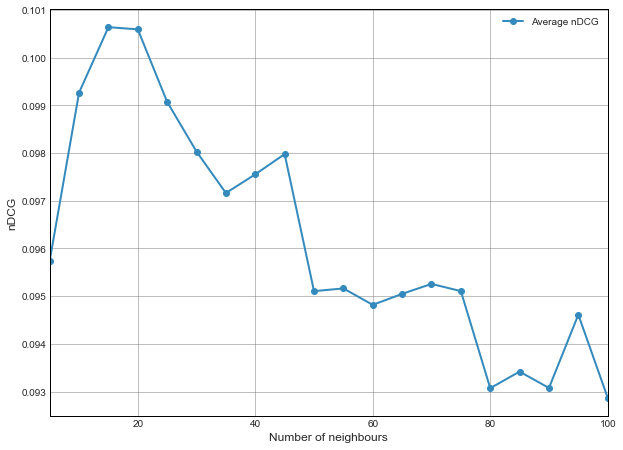

In [16]:
average.plot(x='Neighbours',y='Average nDCG',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("nDCG")
plt.legend(loc='upper right')

# Plot

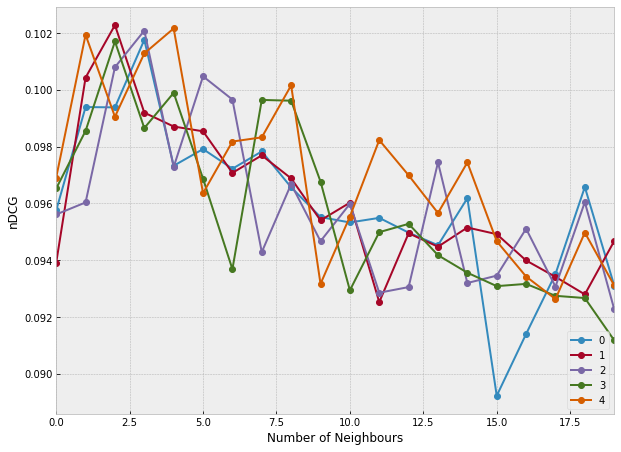

In [11]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\ndcg_metric.csv', sep=',')
metric.plot(figsize= (10,7.5), marker ='o')
style.use('bmh')
pl.xlabel("Number of Neighbours")
pl.ylabel("nDCG")
plt.legend(loc='lower right')